## BlueTides Mock Image Catalogue - Example Codes
This code walks through the steps to 
- read the 'BlueTidesMockImageCatalogue.csv' file
- select BlueTides galaxies based on their properties
- plot these galaxies in a range of telescopes and filters
This code can be used to reproduce the images in Figures 2 and 3 of the Mock Catalogue Release paper.

Note that the key functions can be found in mock_functions.py if you wish to make any modifications. If mock_functions.py is not in the current directory, you will need to add its directory to your PYTHONPATH.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
from astropy.io import fits
import pickle
import mock_functions

Select redshift. We will consider z=7, but z=8,9,10,11 and 12 are also available.

In [2]:
z=7

Load in the catalogue as a Catalogue object. This requires specifying the directory which contains both the 'BlueTidesMockImageCatalogue.csv' file and the catalogue fits images, 'image_path'. 

In [3]:
cat=mock_functions.Catalogue(z=z,image_path='/home/mmarshal/FinalImages/FullCatalogue/')

List the parameters given in the catalogue file, alongside their ranges, if you would like to select a galaxy sample based on these. Note that fluxes are in nJy.

In [4]:
cat.print_constraint_options()

redshift                 :  Min = 7.00e+00,  Max = 7.00e+00
fileNumber               :  Min = 1.00e+00,  Max = 4.00e+00
extensionNumber          :  Min = 1.00e+00,  Max = 1.78e+04
stellarMass              :  Min = 1.95e+07,  Max = 1.29e+11
BHmass                   :  Min = 7.17e+05,  Max = 7.69e+08
BHluminosity             :  Min = 0.00e+00,  Max = 9.85e+46
haloMass                 :  Min = 7.36e+10,  Max = 8.70e+12
lum_FUV                  :  Min = 3.24e+28,  Max = 2.85e+30
lum_jwst.nircam.f090w    :  Min = 5.40e+00,  Max = 1.05e+02
radius_jwst.nircam.f090w :  Min = 5.47e-01,  Max = 1.82e+00
lum_jwst.nircam.f115w    :  Min = 4.12e+01,  Max = 8.13e+02
radius_jwst.nircam.f115w :  Min = 5.09e-01,  Max = 1.79e+00
lum_jwst.nircam.f150w    :  Min = 3.98e+01,  Max = 9.81e+02
radius_jwst.nircam.f150w :  Min = 4.92e-01,  Max = 1.79e+00
lum_jwst.nircam.f200w    :  Min = 3.51e+01,  Max = 1.12e+03
radius_jwst.nircam.f200w :  Min = 4.94e-01,  Max = 1.78e+00
lum_jwst.nircam.f277w    :  Min = 3.49e+

### Select the galaxies
Select galaxies via their properties. Note that all of the constraints are in log space except rad_FUV. Any combination of properties can be used for the constraints.

In [5]:
cat.select_galaxies_with_constraints(stellar_mass_constraint=(10,10.5),bh_mass_constraint=(8,8.5),
                           halo_mass_constraint=(11.5,12),
                           lum_constraint=[('JWST.NIRCAM.F115W',1.8,2),('HST.WFC3.f105w',1.8,2)])

print('Selected {} galaxies'.format(len(cat.catalogueSelected)))

Selected 11 galaxies


Select only galaxies with stellar mass in 10^(10.8)-10^(10.9) solar masses. Print the corresponding catalogue rows.

In [6]:
cat.select_galaxies_with_constraints(stellar_mass_constraint=(10.8,10.9))
print('Selected {} galaxies'.format(len(cat.catalogueSelected)))
cat.catalogueSelected

Selected 10 galaxies


,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,lum_FUV,lum_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,lum_vista.vircam.y,radius_vista.vircam.y,lum_vista.vircam.j,radius_vista.vircam.j,lum_vista.vircam.h,radius_vista.vircam.h,lum_vista.vircam.ks,radius_vista.vircam.ks,lum_spitzer.irac.ch1,lum_spitzer.irac.ch2
3,7.0,1,4,7.077269e+10,292754850.0,7.705151e+46,1.756668e+12,8.049547e+29,79.736259,1.070337,...,634.296875,2.182002,653.300598,2.182002,714.755920,2.182002,709.739441,2.182002,1330.386230,1346.872070
7,7.0,1,8,6.529585e+10,269217060.0,5.073656e+46,1.103594e+12,2.229542e+29,23.772875,1.136111,...,252.938187,2.182002,235.385071,2.182002,281.379059,2.182002,282.228943,2.120525,660.696777,725.953369
12,7.0,1,13,6.757928e+10,185481400.0,4.881772e+46,1.786741e+12,5.485729e+29,41.874634,1.617615,...,425.490479,2.466510,451.371582,2.466510,492.717194,2.412294,495.302612,2.412294,965.721252,1023.901367
18,7.0,1,19,7.548951e+10,154462850.0,4.065380e+46,1.414176e+12,3.832500e+29,29.638481,1.510049,...,306.549316,2.412294,301.898132,2.412294,325.507965,2.356832,315.564819,2.356832,614.631409,638.563660
32,7.0,1,33,6.419608e+10,115706830.0,2.960237e+46,1.234732e+12,3.446866e+29,32.144596,1.279052,...,304.824371,2.241794,315.772766,2.241794,366.901489,2.241794,380.985077,2.182002,804.944275,900.638855
43,7.0,1,44,7.899811e+10,262581890.0,2.494900e+46,1.632567e+12,3.172355e+29,27.379475,1.001346,...,322.160675,2.241794,284.672455,2.300032,343.184814,2.241794,335.753571,2.241794,800.186890,875.004395
52,7.0,1,53,7.101840e+10,265167410.0,2.217095e+46,1.699014e+12,4.337542e+29,31.754704,1.626427,...,342.621185,2.519559,366.869965,2.519559,421.866547,2.466510,448.732300,2.466510,979.278381,1094.715698
106,7.0,1,107,6.336066e+10,333458340.0,1.091541e+46,1.058036e+12,1.238792e+29,15.996870,1.049592,...,150.419510,2.120525,142.807556,2.120525,164.670456,2.120525,163.844452,2.120525,374.524628,413.110565
179,7.0,1,180,6.447992e+10,123055790.0,5.396326e+45,1.315202e+12,1.870919e+29,21.386765,1.402856,...,209.015030,2.356832,206.235748,2.300032,243.364502,2.300032,249.210083,2.241794,562.785583,630.946045
931,7.0,1,932,6.699042e+10,63467252.0,9.643483e+44,8.704022e+12,2.853553e+30,36.372753,1.799712,...,436.439789,2.622440,475.036530,2.571514,584.096069,2.571514,652.167236,2.519559,1533.853149,1845.781738


Instead of selecting galaxies via their properties, select via their indices in the catalogue. For example, Figures 2 and 3 in the Mock Catalogue Release paper, we use galaxy indices 240, 515, and 3701 (randomly chosen). Select these, and print the corresponding catalogue rows.

In [24]:
cat.select_galaxies_with_indices([240,515,3701])
cat.catalogueSelected

,redshift,fileNumber,extensionNumber,stellarMass,BHmass,BHluminosity,haloMass,lum_FUV,lum_jwst.nircam.f090w,radius_jwst.nircam.f090w,...,lum_vista.vircam.y,radius_vista.vircam.y,lum_vista.vircam.j,radius_vista.vircam.j,lum_vista.vircam.h,radius_vista.vircam.h,lum_vista.vircam.ks,radius_vista.vircam.ks,lum_spitzer.irac.ch1,lum_spitzer.irac.ch2
240,7.0,1,241,4.670138e+10,138758060.0,3.900770e+45,1.332076e+12,3.601339e+29,22.038994,1.265224,...,210.564529,2.300032,208.807938,2.300032,231.783096,2.241794,229.303848,2.241794,484.205200,523.094482
3701,7.0,1,3702,5.035402e+09,4998380.5,2.257284e+44,3.931238e+11,1.863760e+29,19.357805,1.312985,...,130.007187,2.120525,152.237396,2.120525,168.376709,2.120525,180.720215,2.057211,336.624664,374.237793
20515,7.0,2,2752,5.880143e+08,1200343.6,3.879584e+43,1.002772e+11,6.797324e+28,13.626022,0.818939,...,72.528053,1.854345,86.917572,1.854345,85.421471,1.854345,84.642166,1.854345,118.039223,118.126740


### Plot the selected galaxies
Now plot the selected catalogue with a range of the available filters and telescopes

<IPython.core.display.Javascript object>


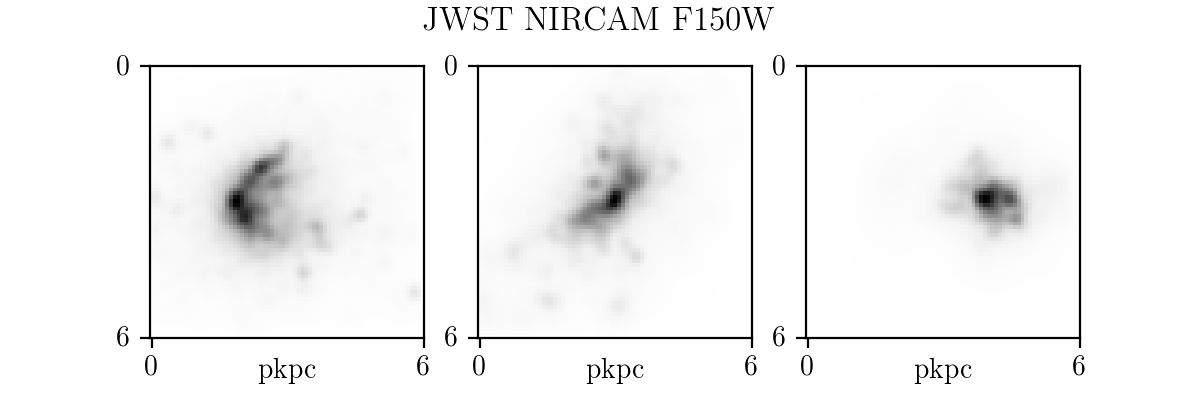

In [25]:
fig=cat.plot_galaxies('JWST','NIRCam','F150W')

Produce Figure 3, the three z=7 galaxies in all JWST filters in the catalogue

<IPython.core.display.Javascript object>


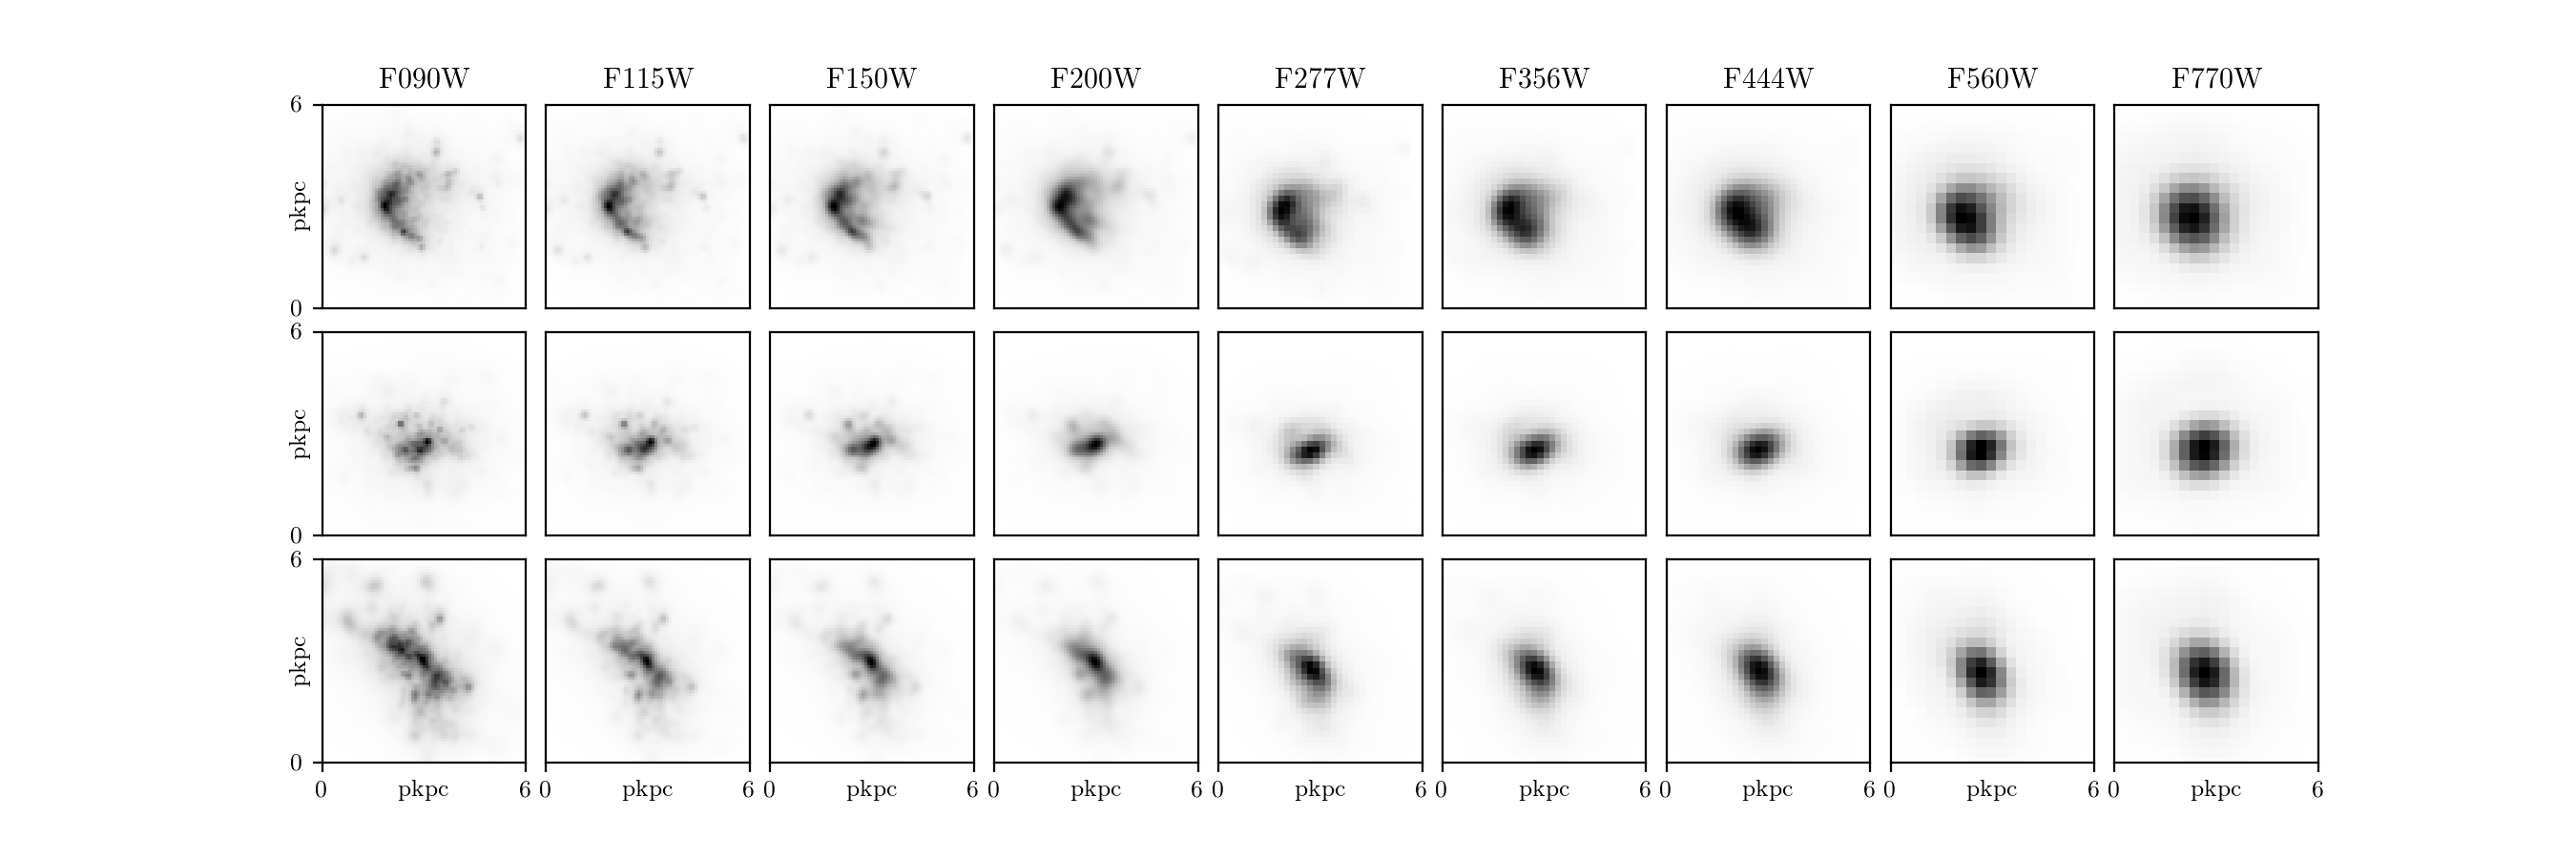

In [9]:
fig=cat.plot_galaxies('JWST','all','all')

<IPython.core.display.Javascript object>


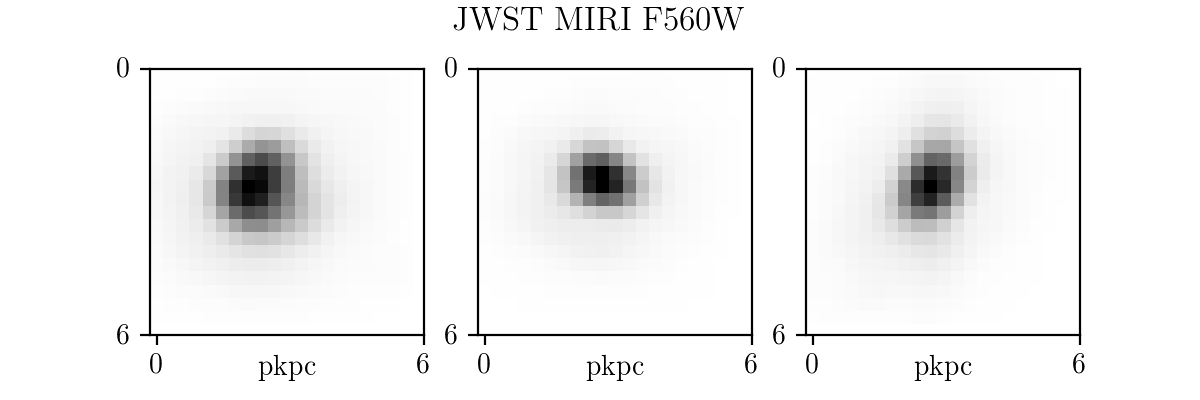

In [19]:
fig=cat.plot_galaxies('JWST','MIRI','F560W')

<IPython.core.display.Javascript object>


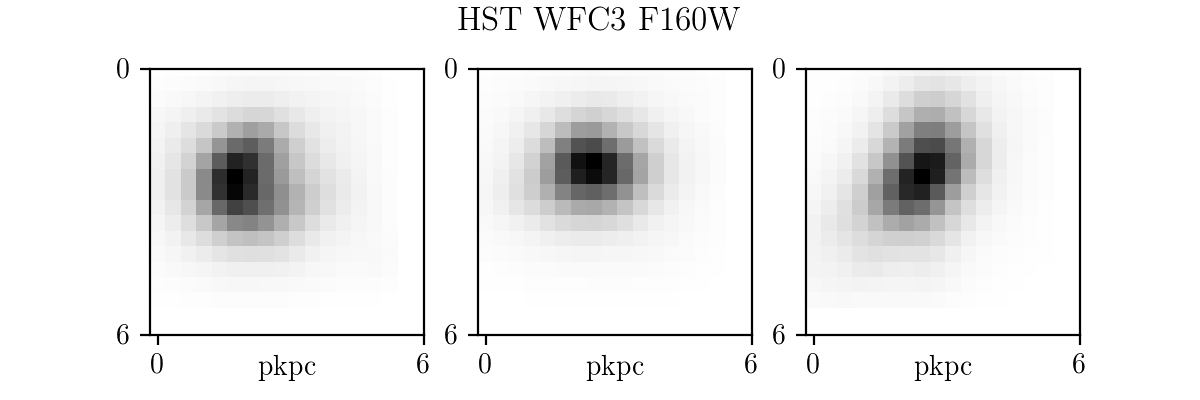

In [20]:
fig=cat.plot_galaxies('HST','WFC3','f160w')

<IPython.core.display.Javascript object>


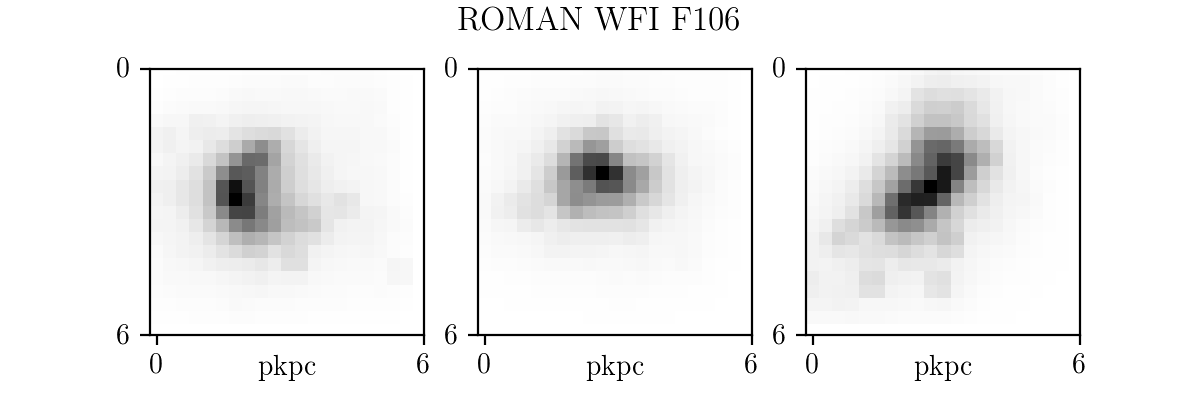

In [21]:
fig=cat.plot_galaxies('Roman','WFI','F106')


Produce Figure 2, the three z=7 galaxies in the Y-band of each telescope in the catalogue.

<IPython.core.display.Javascript object>


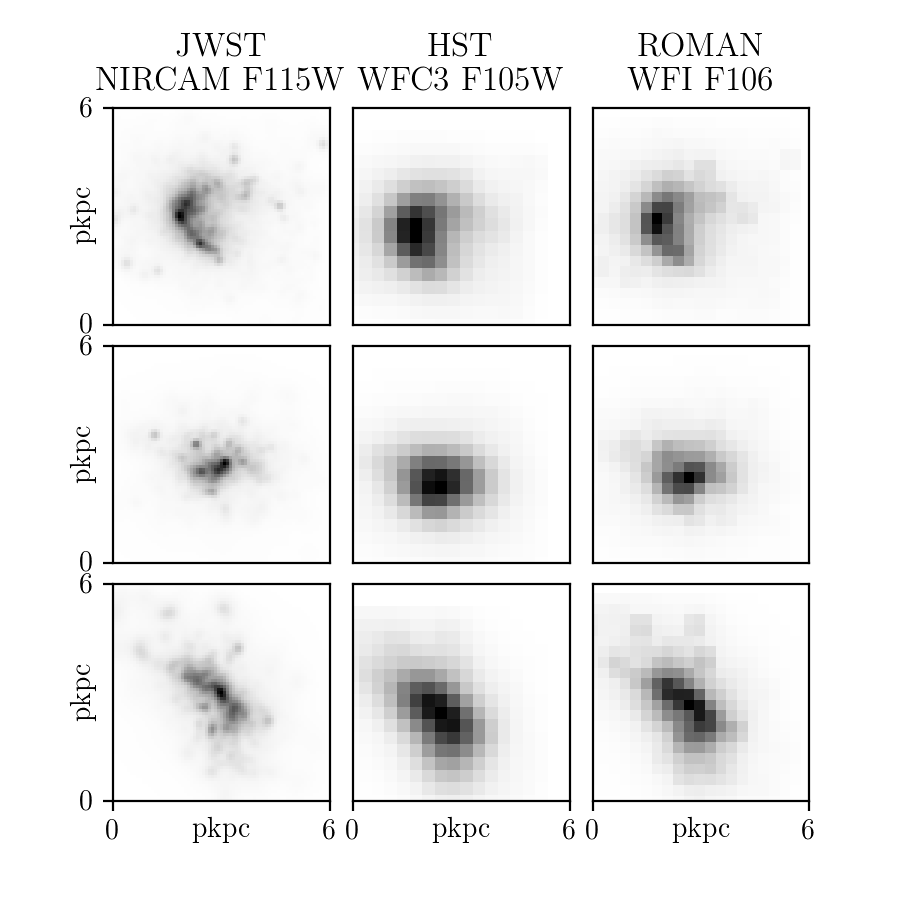

<IPython.core.display.Javascript object>


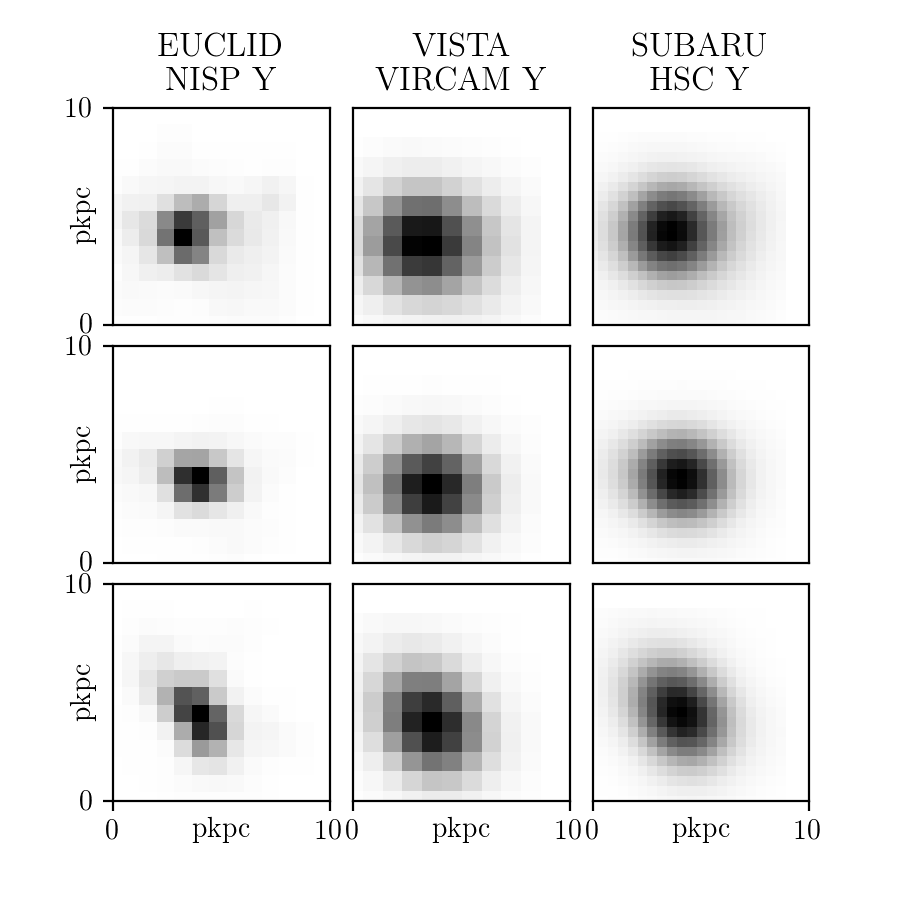

In [22]:
rcParams['font.size'] = (10)
fig,fig2=cat.plot_galaxies('ALL','ALL','Y')
#fig.savefig('plots/YbandImages_1.pdf')
#fig2.savefig('plots/YbandImages_2.pdf')